<a href="https://colab.research.google.com/github/Ivan8Garcia/challenge-data-science/blob/main/TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARTE 2: Prediccion de Cancelación (Churn)**

##**Misión**

Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## **Objetivos del Desafío**

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [154]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

datos=pd.read_csv("/content/datos_TelecomX_tratados.csv")
datos.shape

(7043, 22)

In [155]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [156]:
datos.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [157]:
datos.fillna(0,inplace=True)


In [158]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [159]:
datos.head(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0002-ORFBO,0,Female,0,1,1,9,Yes,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333


In [160]:
datos.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Daily_Charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


In [161]:
datos.describe(include="O")

,customerID,customer.gender,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Male,Yes,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Electronic check
freq,1,3555,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


#**Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [162]:
datos=datos.drop("customerID",axis=1)
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0,Female,0,1,1,9,Yes,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,Yes,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,Yes,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,Yes,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,Yes,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [163]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   int64  
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   int64  
 4   customer.Dependents        7043 non-null   int64  
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

#**Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

Puedes usar **value_counts()** de pandas para obtener esta proporción:

In [164]:
import plotly.express as px

In [165]:
px.histogram(datos, x= 'Churn', text_auto = True)

In [166]:
# 0= NO CHURN  ; 1= CHURN
px.histogram(datos, x = 'customer.gender', text_auto = True, color = 'Churn', barmode = 'group')

Para hacer la separación de los datos entre variables explicativas y variable objetivo, necesitamos detectar cuáles columnas formarán parte de cada uno de estos conjuntos de datos. La variable objetivo es la columna churn. Las variables explicativas son las demás columnas, que explicarán el comportamiento de la variable objetivo.

In [167]:
X = datos.drop('Churn', axis = 1)
y = datos['Churn']


#**Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [168]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


categoricas = ['customer.gender','phone.PhoneService','account.Contract','account.PaymentMethod', 'phone.MultipleLines','internet.InternetService',
               'internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV',
               'internet.StreamingMovies']

In [169]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)



In [170]:
columnas = X.columns
X = one_hot_enc.fit_transform(X)
X = pd.DataFrame(X, columns=one_hot_enc.get_feature_names_out(columnas))

Después de transformar las variables explicativas, queda transformar la variable objetivo. Vamos a utilizar el LabelEncoder, que es el método recomendado para esta tarea.

In [171]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

1 - Vamos a separar el conjunto de datos entre entrenamiento y prueba, para ello necesitamos utilizar el método train_test_split de la biblioteca Scikit-Learn. Primero, vamos a importar la función con el código:

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)

2 - Con los datos separados entre entrenamiento y prueba, podemos generar el modelo base con el DummyClassifier a partir de los datos de entrenamiento. Primero, vamos a importar la función:

In [173]:
from sklearn.dummy import DummyClassifier

In [174]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)


0.7348097671777399

3 - Para construir un modelo de árbol de decisión, necesitamos los mismos pasos que el modelo base. Debemos importar la función, inicializar el modelo, hacer el ajuste del modelo en los datos de entrenamiento y, por último, evaluar el desempeño en los datos de prueba. Vamos entonces a cada una de estas tareas, utilizando el **max_depth=5** al momento de inicializar el modelo

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
arbol = DecisionTreeClassifier(max_depth = 10, random_state =5)
arbol.fit(X_train,y_train)

arbol.score(X_test,y_test)

0.768313458262351

In [177]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

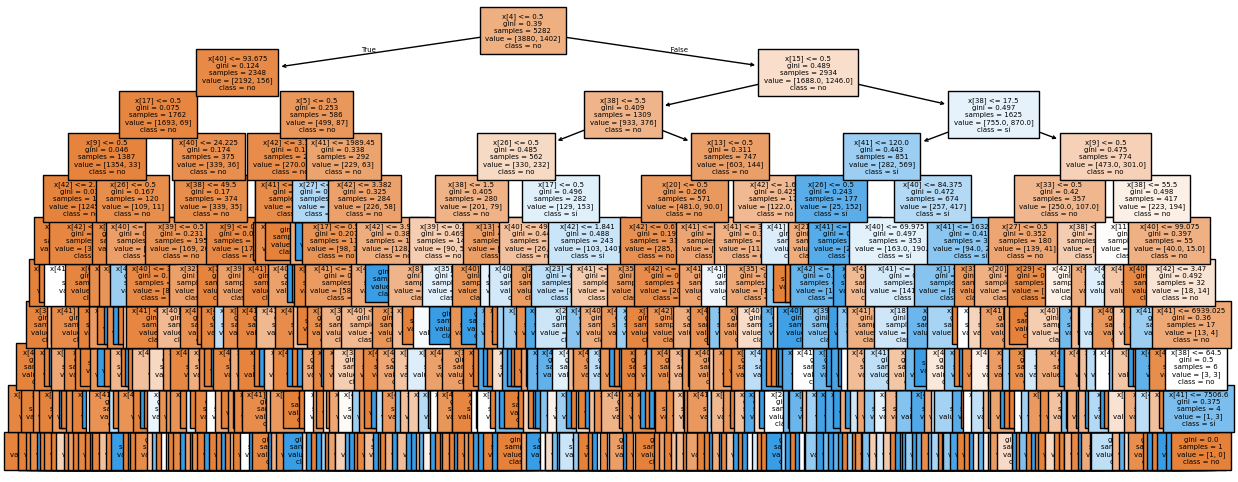

In [178]:
plt.figure(figsize = (15, 6))
plot_tree(arbol, filled = True, class_names = ['no', 'sí'], fontsize = 5);

In [179]:
#Esto te mostrará cuántos valores faltantes hay en cada columna.
X_train.isnull().sum()

,0
onehotencoder__customer.gender_Female,0
onehotencoder__customer.gender_Male,0
onehotencoder__phone.PhoneService_No,0
onehotencoder__phone.PhoneService_Yes,0
onehotencoder__account.Contract_Month-to-month,0
onehotencoder__account.Contract_One year,0
onehotencoder__account.Contract_Two year,0
onehotencoder__account.PaymentMethod_Bank transfer (automatic),0
onehotencoder__account.PaymentMethod_Credit card (automatic),0
onehotencoder__account.PaymentMethod_Electronic check,0


In [180]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth = 10, random_state=5)
rf.fit(pd.DataFrame(X_train), y_train)
rf.score(X_test,y_test)

0.8086314593980692

# **Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como **Decision Tree, Random Forest y XGBoost,** no son sensibles a la escala de los datos.

In [181]:
from sklearn.preprocessing import MinMaxScaler

1 - Para hacer la normalización de los datos, vamos a utilizar el método MinMaxScaler. Primero, importamos la función y luego hacemos la transformación de los datos de entrenamiento de las variables explicativas, almacenando en una nueva variable **X_train_normalizado:**

In [182]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train_imputado)

In [183]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputado = imputer.fit_transform(X_train)
X_train_normalizado = normalizacion.fit_transform(X_train_imputado)

si quisieramos visualizar el resultado de la transformación, podemos utilizar el método pd.DataFrame para generar una tabla con los datos:

In [184]:
#Esto devolverá todas las filas que contienen al menos un valor faltante.
np.isnan(X_train_normalizado).sum()

np.int64(0)

In [185]:
#Si ya normalizaste los datos y quieres verificar:

#Esto te dice cuántos valores NaN hay en el array después de la normalización.

#Si X_train_normalizado todavía es un DataFrame:
pd.DataFrame(X_train_normalizado).isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


2 - Con los datos normalizados, podemos generar el modelo de vecinos más cercanos con el KNeighborsClassifier a partir de los datos de entrenamiento normalizados. Primero, importamos la función

In [186]:
from sklearn.neighbors import KNeighborsClassifier

In [187]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputado = imputer.fit_transform(X_train)
X_train_normalizado = normalizacion.fit_transform(X_train_imputado) # Redundant

In [188]:
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [189]:
X_test_imputado = imputer.transform(X_test)
X_test_normalizado = normalizacion.transform(X_test_imputado) # Redundante

In [190]:
knn.score(X_test_normalizado, y_test)

0.7688813174332766

In [191]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud Árbol: {arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')
print(f'Exactitud RF: {rf.score(X_test,y_test)}')

Exactitud Dummy: 0.7348097671777399
Exactitud Árbol: 0.768313458262351
Exactitud KNN: 0.7688813174332766
Exactitud RF: 0.8086314593980692


#**Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor **correlación con la cancelación(churn)**, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

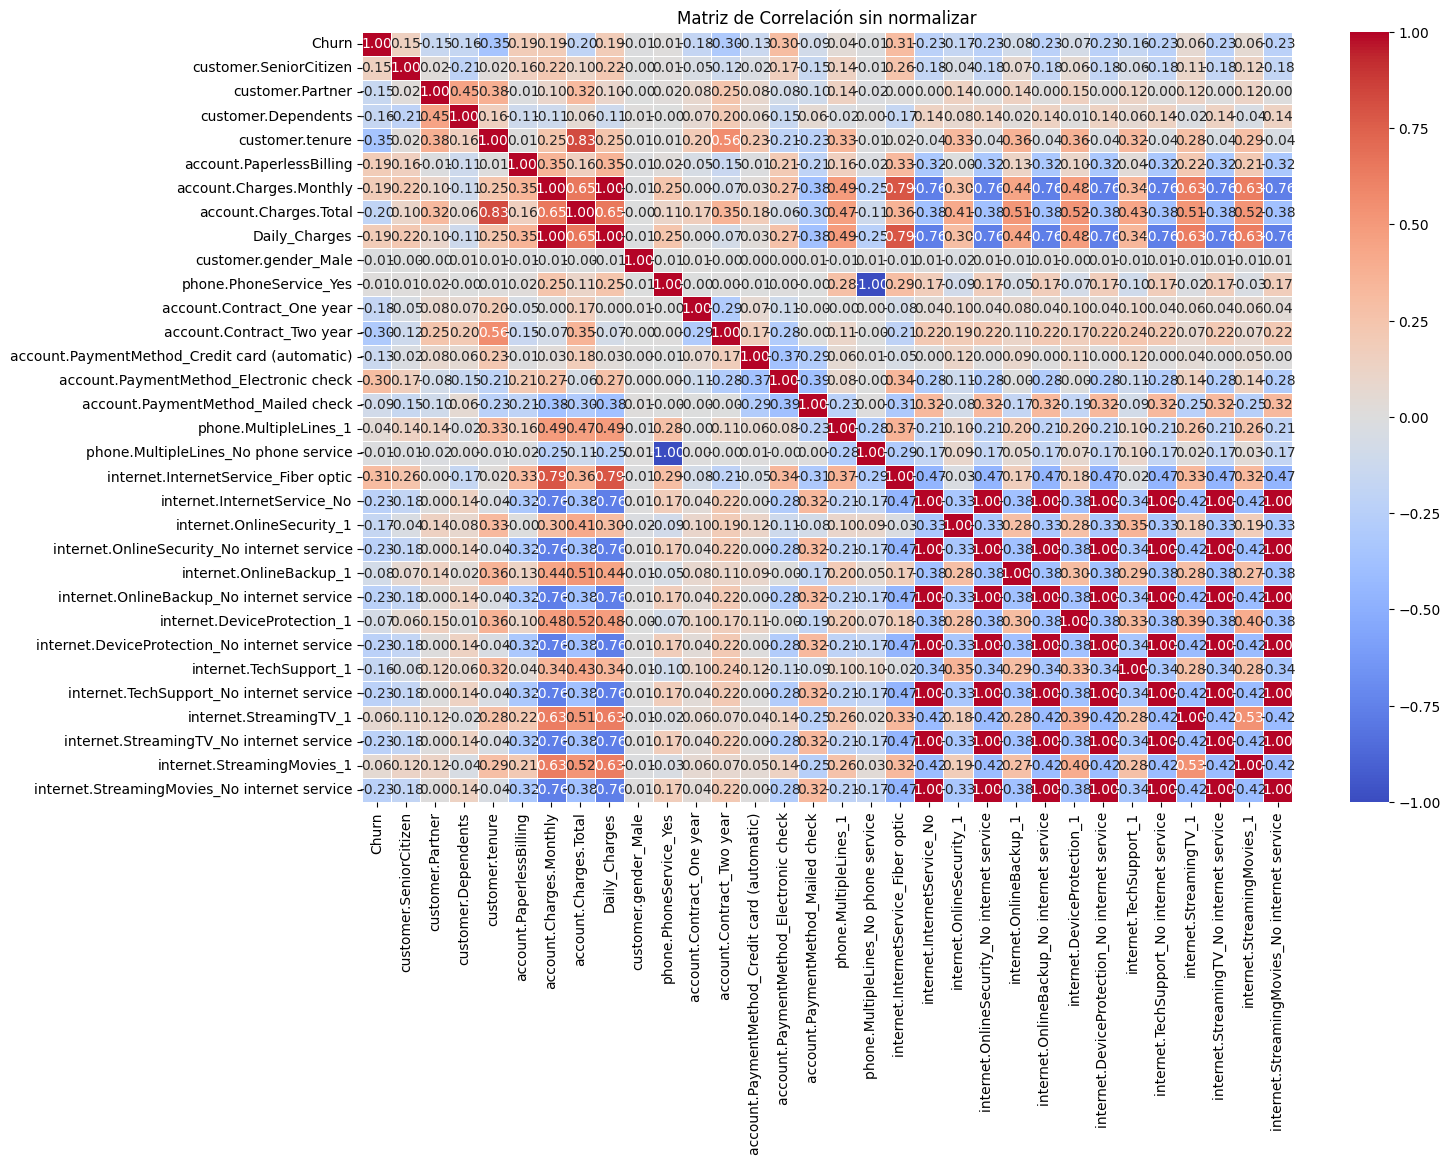


Correlación con Churn:
Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
Daily_Charges                                    0.193356
account.PaperlessBilling                         0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_1                           0.063228
internet.StreamingMovies_1                       0.061382
phone.MultipleLines_1                            0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_1                     -0.066160
internet.OnlineBackup_1                         -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply one-hot encoding to the categorical columns in the 'datos' DataFrame
datos_encoded = pd.get_dummies(datos, columns=categoricas, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = datos_encoded.corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación sin normalizar')
plt.show()

# Opcionalmente, puedes mostrar solo las correlaciones con 'Churn'
print("\nCorrelación con Churn:")
print(correlation_matrix['Churn'].sort_values(ascending=False))

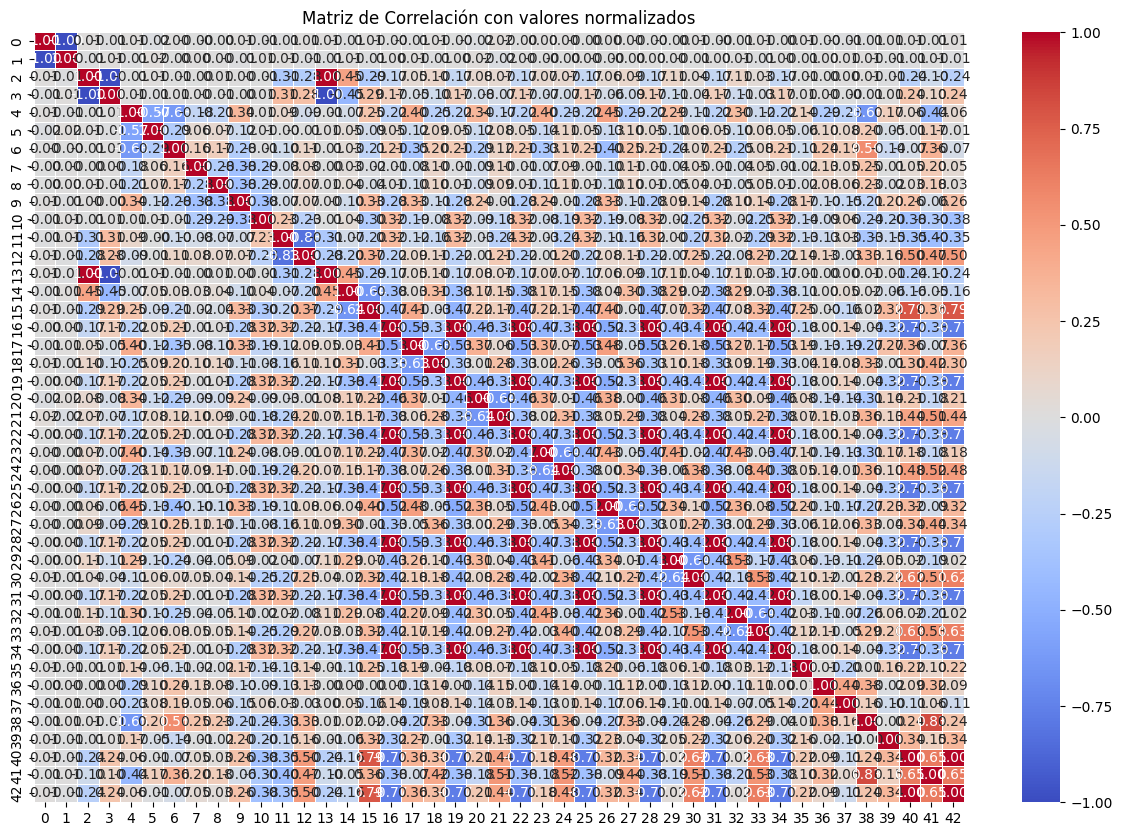


Correlación con Churn:
Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
Daily_Charges                                    0.193356
account.PaperlessBilling                         0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_1                           0.063228
internet.StreamingMovies_1                       0.061382
phone.MultipleLines_1                            0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_1                     -0.066160
internet.OnlineBackup_1                         -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.000000,-1.000000,0.008294,-0.008294,0.009905,-0.016946,0.004525,-0.001438,-0.001066,0.010099,...,0.009357,-0.004814,0.005450,-0.001716,-0.008462,-0.012311,0.005985,0.011731,-0.007061,0.011731
1,-1.000000,1.000000,-0.008294,0.008294,-0.009905,0.016946,-0.004525,0.001438,0.001066,-0.010099,...,-0.009357,0.004814,-0.005450,0.001716,0.008462,0.012311,-0.005985,-0.011731,0.007061,-0.011731
2,0.008294,-0.008294,1.000000,-1.000000,-0.006429,0.013198,-0.005022,-0.001511,0.005104,0.003591,...,0.033350,-0.170388,-0.005281,-0.004274,0.000336,0.008183,-0.011535,-0.243439,-0.104400,-0.243439
3,-0.008294,0.008294,-1.000000,1.000000,0.006429,-0.013198,0.005022,0.001511,-0.005104,-0.003591,...,-0.033350,0.170388,0.005281,0.004274,-0.000336,-0.008183,0.011535,0.243439,0.104400,0.243439
4,0.009905,-0.009905,-0.006429,0.006429,1.000000,-0.569023,-0.625996,-0.184824,-0.205679,0.336378,...,-0.115104,-0.220634,0.138385,-0.289656,-0.231859,-0.645257,0.166893,0.064091,-0.444612,0.064091
5,-0.016946,0.016946,0.013198,-0.013198,-0.569023,1.000000,-0.285062,0.061776,0.071871,-0.123215,...,0.060145,0.050536,-0.055742,0.099882,0.084732,0.200996,-0.054557,-0.007918,0.165021,-0.007918
6,0.004525,-0.004525,-0.005022,0.005022,-0.625996,-0.285062,1.000000,0.156850,0.171586,-0.275240,...,0.077131,0.209249,-0.108442,0.242906,0.189905,0.561511,-0.142795,-0.067196,0.361753,-0.067196
7,-0.001438,0.001438,-0.001511,0.001511,-0.184824,0.061776,0.156850,1.000000,-0.280326,-0.378029,...,0.052434,-0.008893,-0.024798,0.126363,0.048009,0.251070,-0.007608,0.049088,0.198708,0.049088
8,-0.001066,0.001066,0.005104,-0.005104,-0.205679,0.071871,0.171586,-0.280326,1.000000,-0.375319,...,0.045194,0.005351,-0.019790,0.078410,0.063121,0.230983,-0.019133,0.029751,0.177141,0.029751
9,0.010099,-0.010099,0.003591,-0.003591,0.336378,-0.123215,-0.275240,-0.378029,-0.375319,1.000000,...,0.138908,-0.280677,0.165540,-0.096972,-0.148770,-0.211895,0.199067,0.263572,-0.064223,0.263572


In [193]:
#datos_encoded_normalizado la cree para visualizar otro mapa de calor de correlaciones
datos_encoded_normalizado =(X_train_normalizado)

#hay que generar la matriz de correlacion usando los datos de X_train_normalizado
correlation_matrix_=pd.DataFrame(datos_encoded_normalizado).corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación con valores normalizados')
plt.show()

# Opcionalmente, puedes mostrar solo las correlaciones con 'Churn'
print("\nCorrelación con Churn:")
print(correlation_matrix['Churn'].sort_values(ascending=False))

correlation_matrix_

In [194]:
df=pd.DataFrame(X_train_normalizado)

#**Análisis Dirigido**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

**Tiempo de contrato x Cancelación**

**Gasto total x Cancelación**

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

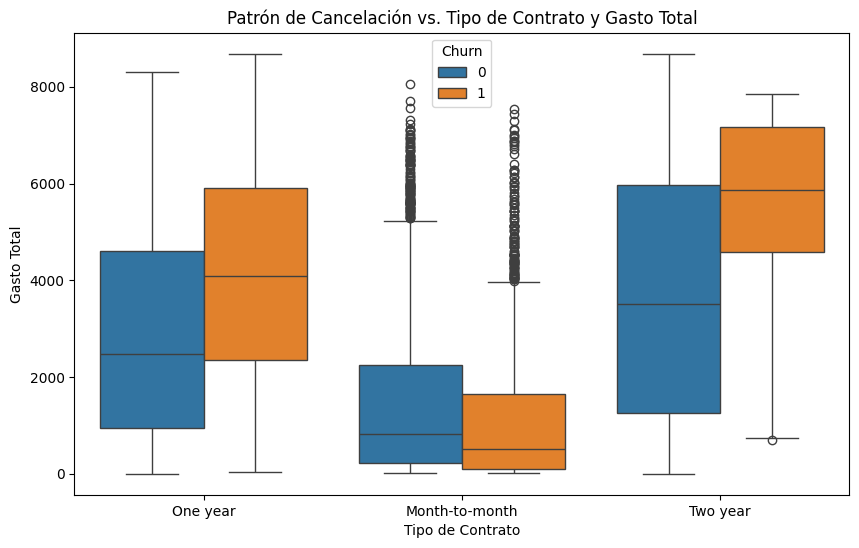

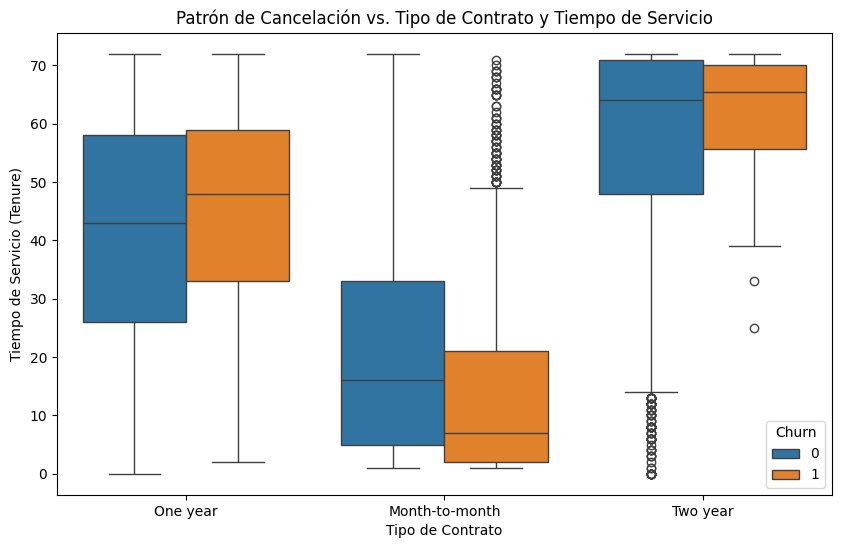

In [195]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='account.Contract', y='account.Charges.Total', hue='Churn', data=datos)
plt.title('Patrón de Cancelación vs. Tipo de Contrato y Gasto Total')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Gasto Total')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='account.Contract', y='customer.tenure', hue='Churn', data=datos)
plt.title('Patrón de Cancelación vs. Tipo de Contrato y Tiempo de Servicio')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tiempo de Servicio (Tenure)')
plt.show()


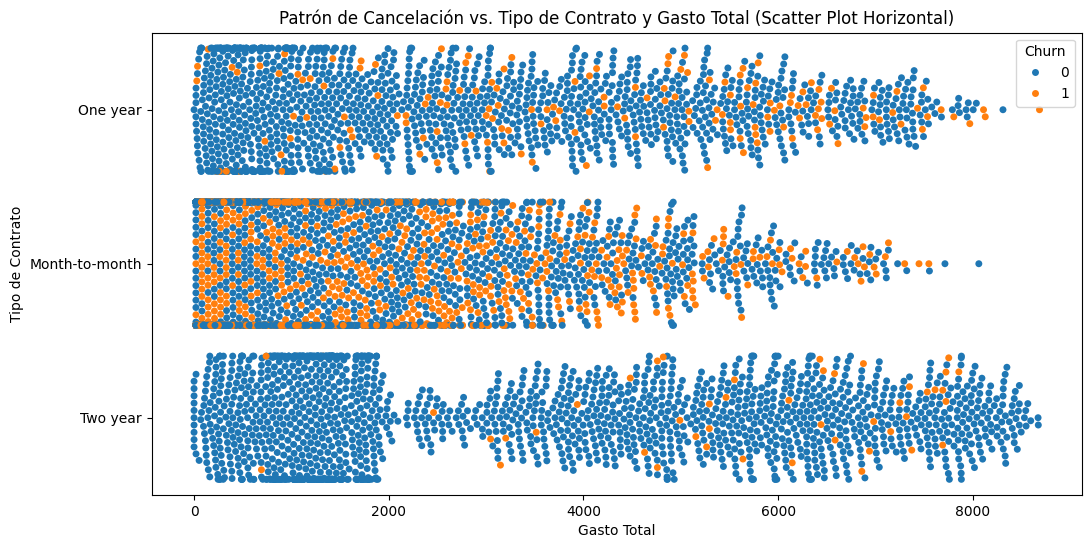

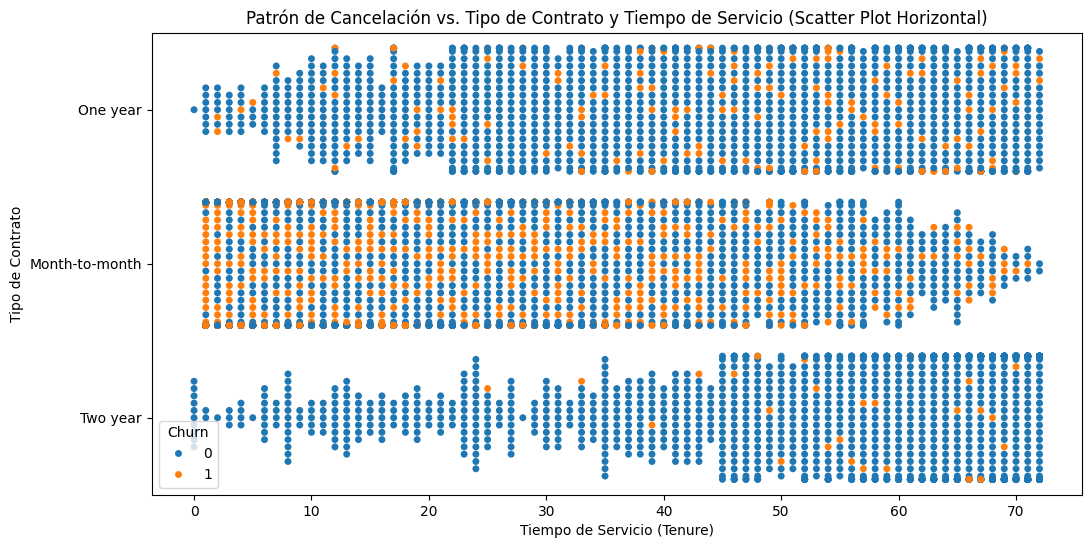

In [196]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='account.Charges.Total', y='account.Contract', hue='Churn', data=datos)
plt.title('Patrón de Cancelación vs. Tipo de Contrato y Gasto Total (Scatter Plot Horizontal)')
plt.xlabel('Gasto Total')
plt.ylabel('Tipo de Contrato')
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(x='customer.tenure', y='account.Contract', hue='Churn', data=datos)
plt.title('Patrón de Cancelación vs. Tipo de Contrato y Tiempo de Servicio (Scatter Plot Horizontal)')
plt.xlabel('Tiempo de Servicio (Tenure)')
plt.ylabel('Tipo de Contrato')
plt.show()


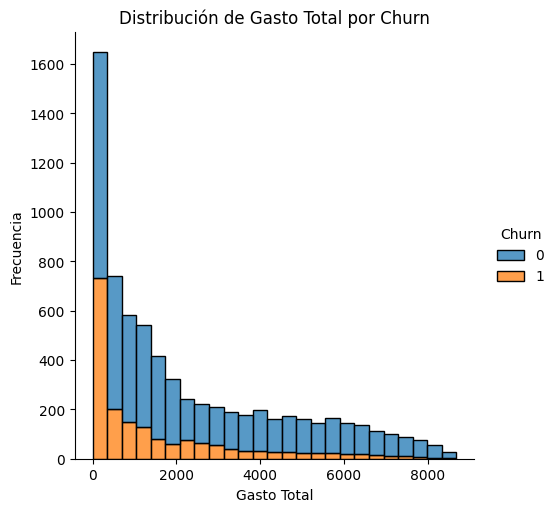

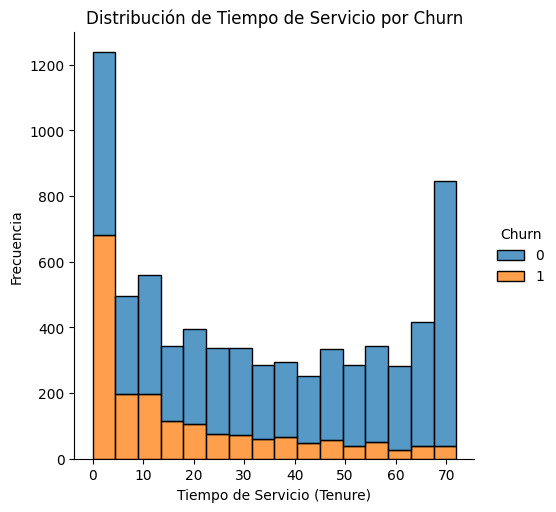

In [197]:
# prompt: por ultimo genera una grafica de distribucion de frecuencias usando displot

sns.displot(data=datos, x="account.Charges.Total", hue="Churn", kind="hist", multiple="stack")
plt.title('Distribución de Gasto Total por Churn')
plt.xlabel('Gasto Total')
plt.ylabel('Frecuencia')
plt.show()

sns.displot(data=datos, x="customer.tenure", hue="Churn", kind="hist", multiple="stack")
plt.title('Distribución de Tiempo de Servicio por Churn')
plt.xlabel('Tiempo de Servicio (Tenure)')
plt.ylabel('Frecuencia')
plt.show()

#**Modelado Predictivo**

**Separación de Datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [198]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import pandas as pd
import numpy as pd

In [199]:
datos.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Daily_Charges'],
      dtype='object')

In [200]:
datos

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0,Female,0,1,1,9,Yes,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0,Male,0,0,0,9,Yes,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,1,Male,0,0,0,4,Yes,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1,Male,1,1,0,13,Yes,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1,Female,1,1,0,3,Yes,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,0,0,13,Yes,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7039,1,Male,0,1,0,22,Yes,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7040,0,Male,0,0,0,2,Yes,0,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7041,0,Male,0,1,1,67,Yes,0,DSL,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [201]:
#ahora tenemos que dividir el conjunto de nuestros datos en entrenamiento y prueba, la division sera 70% para entrenamiento y 30% para prueba
#este dataframe normalizado ya no tiene la columna churn porque eso se hizo desde el comienzo
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.847222,1.0,0.429851,0.431921,0.429851
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.958333,1.0,0.429851,0.475682,0.429851
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.652778,1.0,0.663682,0.462653,0.663682
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.986111,1.0,0.902985,0.882208,0.902985
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.254229,0.062287,0.254229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.375000,0.0,0.319403,0.162508,0.319403
5278,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.486111,1.0,0.944776,0.450678,0.944776
5279,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.361111,1.0,0.331343,0.149157,0.331343
5280,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.270647,0.016316,0.270647


In [202]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud Árbol: {arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')
print(f'Exactitud RF: {rf.score(X_test,y_test)}')

Exactitud Dummy: 0.7348097671777399
Exactitud Árbol: 0.768313458262351
Exactitud KNN: 0.7688813174332766
Exactitud RF: 0.8086314593980692


In [203]:
#segundo,empezaremos a segmentar nuestras X_train,etc...
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)
#X=datos.drop(columns="Churn")
#y=datos["Churn"]


In [204]:
baseline=DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [205]:
#ahora vamos a evaluar el modelo usando metricas
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred_dummy=baseline.predict(X_test)

def calcular_regresion (y_test,y_pred):
  rmse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test,y_pred)
  metricas={
      "RMSE":round(rmse**(1/2),4),
      "MAE":round(mae,4),
      "R2":round(r2,4)
  }
  return metricas

In [206]:
#aqui vemos que el modelo generalizó de una manera no tan buena
#RMSE=Error Cuadratico Medio , MAE=Error Absoluto Medio
resultados_baseline=calcular_regresion(y_test,y_pred_dummy)
resultados_baseline

{'RMSE': 0.4391, 'MAE': 0.3887, 'R2': -0.0002}

In [207]:
import pandas as pd

#Datos de entrenamiento para usar la fórmula
df_train=pd.DataFrame(X_train)
df_train["Churn"]=y_train

#**Creación de Modelos**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

**Justificación:**

**Regresión Logística / KNN:** Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

**Árbol de Decisión / Random Forest:** Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [208]:
from sklearn.tree import DecisionTreeClassifier

In [209]:
modelo_0 = DecisionTreeClassifier(max_depth = 5, random_state =5)
modelo_0.fit(pd.DataFrame(X_train),y_train)

modelo_0.score(X_test,y_test)

0.791292001893043

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
modelo_1 = RandomForestClassifier(max_depth = 10, random_state=5)
modelo_1.fit(pd.DataFrame(X_train), y_train)
modelo_1.score(X_test,y_test)


0.8031235210601041

In [212]:
from sklearn.neighbors import KNeighborsClassifier

In [213]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputado = imputer.fit_transform(X_train)
X_train_normalizado = normalizacion.fit_transform(X_train_imputado)

In [214]:
modelo_2 = KNeighborsClassifier()
modelo_2.fit(X_train_imputado,y_train)

KNeighborsClassifier()

In [215]:
modelo_2.score(X_train_imputado,y_train)


0.8300202839756592

#**Evaluación de los Modelos**

Evalúa cada modelo utilizando las siguientes métricas:

**Exactitud (Acurácia)**

**Precisión**

**Recall**

**F1-score**

**Matriz de confusión**

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

**Overfitting:** Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

**Underfitting:** Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X,X_test,y,y_test=train_test_split(X,y,test_size=0.3,stratify=y ,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y ,random_state=5)

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
modelo_1 = RandomForestClassifier(max_depth = 10, random_state=5)
modelo_1.fit(pd.DataFrame(X_train), y_train)
modelo_1.score(X_test,y_test)

0.8088026502602934

In [220]:
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo_1.score(pd.DataFrame(X_train),y_train)}')
print(f'La exactitud del modelo con el conjunto de validacion es de: {modelo_1.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.8972139572626454
La exactitud del modelo con el conjunto de validacion es de: 0.7996755879967559


In [221]:
from sklearn.metrics import confusion_matrix

In [222]:

y_previsto= modelo_1.predict(X_val)
matriz_confusion=confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[812  94]
 [153 174]]


In [223]:
from sklearn.metrics import ConfusionMatrixDisplay

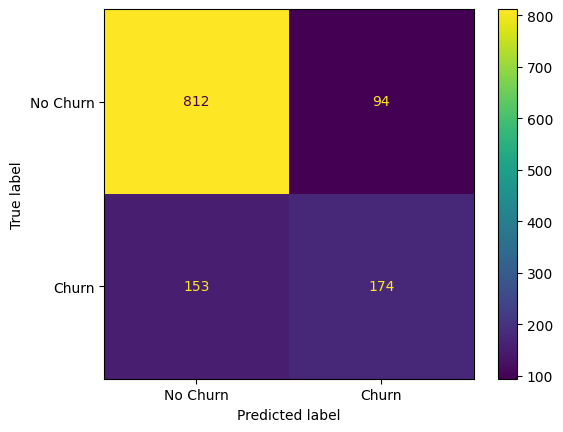

In [224]:
visualizacion= ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,display_labels=["No Churn","Churn"])
visualizacion.plot();

In [225]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [226]:
print(f'La precisión del modelo es de: {precision_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es de: {accuracy_score(y_val,y_previsto)}')
print(f'La sensibilidad (recall) del modelo es de: {recall_score(y_val,y_previsto)}')
print(f'El f1 score del modelo es de: {f1_score(y_val,y_previsto)}')


La precisión del modelo es de: 0.6492537313432836
La exactitud (accuracy) del modelo es de: 0.7996755879967559
La sensibilidad (recall) del modelo es de: 0.5321100917431193
El f1 score del modelo es de: 0.584873949579832


In [227]:
from sklearn.metrics import RocCurveDisplay

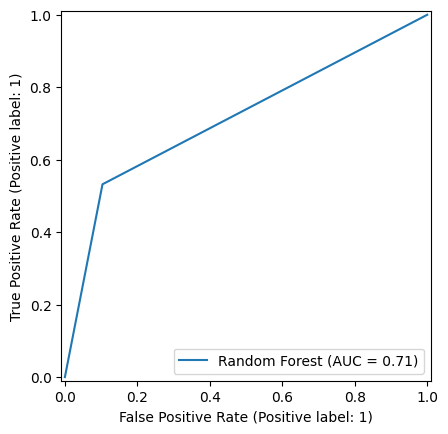

In [228]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name="Random Forest");

In [229]:
from sklearn.metrics import roc_auc_score
print(f'El area bajo la curva ROC es:{roc_auc_score(y_val,y_previsto)}')

El area bajo la curva ROC es:0.7141786661806104


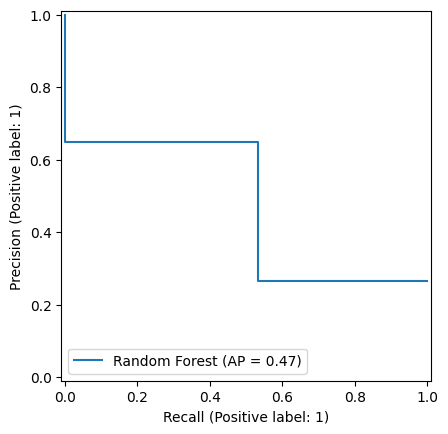

In [230]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name="Random Forest");

In [231]:
from sklearn.metrics import average_precision_score
print(f"El score promedio de Precision vs Recall es de:{average_precision_score(y_val,y_previsto)}")

El score promedio de Precision vs Recall es de:0.4695620537905131


In [232]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       906
           1       0.65      0.53      0.58       327

    accuracy                           0.80      1233
   macro avg       0.75      0.71      0.73      1233
weighted avg       0.79      0.80      0.79      1233



##**Validacion Cruzada**

In [233]:
from sklearn.model_selection import KFold, cross_validate


In [234]:
modelo_1 = RandomForestClassifier(max_depth = 10)
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo_1,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.57407069, 0.55936527, 0.56032634, 0.57193732, 0.57548547]),
 'score_time': array([0.02208924, 0.02450109, 0.02215314, 0.02236986, 0.03283191]),
 'test_score': array([0.77586207, 0.81643002, 0.81034483, 0.79817444, 0.78194726])}

In [235]:
cv_resultados["test_score"]

array([0.77586207, 0.81643002, 0.81034483, 0.79817444, 0.78194726])

In [236]:
promedio=cv_resultados["test_score"].mean()
desvio_estandar=cv_resultados["test_score"].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvio estandar es de: {desvio_estandar}')
print(f'El intervalo de confianza es:[{promedio- 2 *desvio_estandar},{min(promedio + 2*desvio_estandar,1)}]')

El promedio de la exactitud es de: 0.7965517241379311
El desvio estandar es de: 0.01568044469783992
El intervalo de confianza es:[0.7651908347422512,0.8279126135336109]


##**Validación cruzada con sensibilidad**

In [237]:
def intervalo_confianza(resultados):
  promedio=resultados["test_score"].mean()
  desvio_estandar=resultados["test_score"].std()
  return f'El intervalo de confianza es:[{promedio- 2 *desvio_estandar},{min(promedio + 2*desvio_estandar,1)}]'

In [238]:
modelo_1 = RandomForestClassifier(max_depth = 10)
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo_1,X,y,cv=kf,scoring="recall")
cv_resultados

{'fit_time': array([0.5869832 , 0.55446601, 0.55037665, 0.5914917 , 0.57890534]),
 'score_time': array([0.02513909, 0.02481842, 0.02437258, 0.02482581, 0.02519703]),
 'test_score': array([0.4795539 , 0.46245059, 0.55514706, 0.48995984, 0.50943396])}

In [239]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.43570645190759455,0.5629116907628896]'

##**Exactitud, Recall, Precisión, F1-score(Random Forest)**

In [240]:
modelo_1 = RandomForestClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo_1, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.60761309, 0.5518086 , 0.64738107, 0.9478395 , 0.90432668]),
 'score_time': array([0.02950978, 0.02891731, 0.03998256, 0.04107952, 0.04466796]),
 'test_accuracy': array([0.77079108, 0.81237323, 0.79918864, 0.79310345, 0.78904665]),
 'test_recall': array([0.47211896, 0.49407115, 0.51102941, 0.46987952, 0.50943396]),
 'test_precision': array([0.60189573, 0.68681319, 0.68137255, 0.61904762, 0.63380282]),
 'test_f1': array([0.52916667, 0.57471264, 0.58403361, 0.53424658, 0.56485356])}

El resultado obtenido es un diccionario con los tiempos de ajuste de los modelos, tiempos de cálculo de las métricas y los resultados de cada una de las métricas para cada uno de los 5 modelos del KFold:

In [241]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [242]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.7657352226486277, 0.8200659943899119]
Intervalo de confianza(test_recall): [0.4560643670365727, 0.5265488319450321]
Intervalo de confianza(test_precision): [0.5768969127077956, 0.7122758498437958]
Intervalo de confianza(test_f1): [0.5136045778256724, 0.6012006444215385]


##**Balanceo de Clases (opcional)**

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como **SMOTE** pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [257]:
# 0=No Churn 1=Churn
datos.Churn.value_counts()

,count
Churn,
0,5174
1,1869


In [258]:
#visualizamos estos datos en porcentaje para darnos cuenta que está desbalanceado
datos.Churn.value_counts(normalize=True)

,proportion
Churn,
0,0.73463
1,0.26537


In [259]:
from sklearn.model_selection import StratifiedKFold

In [267]:
modelo_1 = RandomForestClassifier(max_depth = 10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo_1,X,y,cv=skf,scoring="recall")

In [268]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.3552982293473016,0.6536944054828243]'

##**Oversampling**

In [262]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are the features and target variable for training

over_sampling = SMOTE(random_state=5)
X_train_resampled, y_train_resampled = over_sampling.fit_resample(X_train, y_train)

print("Proporción de clases antes del balanceo (entrenamiento):")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nProporción de clases después del balanceo con SMOTE (entrenamiento):")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

Proporción de clases antes del balanceo (entrenamiento):
0    0.734544
1    0.265456
Name: proportion, dtype: float64

Proporción de clases después del balanceo con SMOTE (entrenamiento):
1    0.5
0    0.5
Name: proportion, dtype: float64


In [269]:
modelo_1 = RandomForestClassifier(max_depth = 10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo_1,X_train_resampled, y_train_resampled,cv=skf,scoring="recall")

In [270]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.8261705555615014,0.8939454825653114]'

##**pipeline para validacion**

In [271]:
from imblearn.pipeline import Pipeline as imbpipeline

In [273]:
modelo_1 = RandomForestClassifier(max_depth = 10)
pipeline=imbpipeline([("oversample",SMOTE()),("randomForest",modelo_1)])

In [274]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(pipeline,X,y,cv=skf,scoring="recall")

In [275]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.4629631684380323,0.7490824480979618]'

##**Undersampling**

In [276]:
from imblearn.under_sampling import NearMiss

In [277]:
modelo_1= RandomForestClassifier(max_depth=10)
pipeline=imbpipeline([("undersample",NearMiss(version=3)),("randomForest",modelo_1)])
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(pipeline,X,y,cv=skf,scoring="recall")

In [278]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.6055951913064948,0.8465787217369833]'

#**Probando el modelo**

In [281]:
#procedemos a probar el modelo con el mejor metodo que fue (undersample)
undersample=NearMiss(version=3)

In [282]:
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)
modelo_1 = RandomForestClassifier(max_depth = 10)
modelo_1.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10)

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1087
           1       0.50      0.73      0.59       392

    accuracy                           0.73      1479
   macro avg       0.69      0.73      0.70      1479
weighted avg       0.78      0.73      0.75      1479



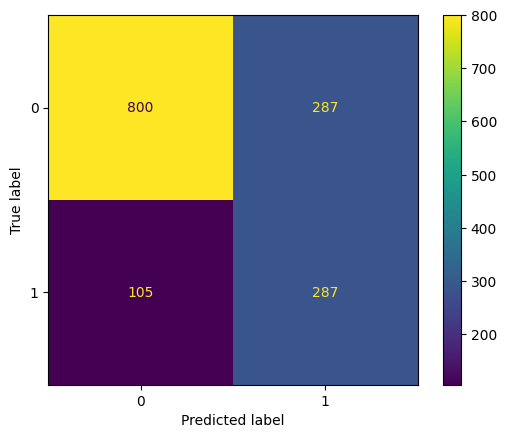

In [283]:
#ahora es el momento para usar X_test(datos que el modelo nunca vió)para ver como se desempeña el modelo
y_previsto=modelo_1.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);


In [284]:

modelo_1 = RandomForestClassifier(max_depth = 10)
modelo_1.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo_1.score(X_train, y_train)}')
print(f'Precisión de validación: {modelo_1.score(X_val, y_val)}')

Precisión de entrenamiento: 0.9223338485316847
Precisión de validación: 0.7972190034762456


In [ ]:
# prompt: genera un reporte Después, realiza un análisis crítico y compara los modelos:
# ¿Cuál modelo tuvo el mejor desempeño?
# ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import RocCurveDisplay, roc_auc_score, PrecisionRecallDisplay, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbpipeline
import pandas as pd
import numpy as np

# Assuming X and y are already defined and preprocessed from the preceding code.
# If not, you would need to include the preceding data loading and preprocessing steps here.

print("\n--- Evaluación de Modelos ---")

# Dummy Classifier Evaluation
dummy = DummyClassifier(strategy='stratified', random_state=5) # Use stratified for classification baseline
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("\n--- Dummy Classifier ---")
print(classification_report(y_test, y_pred_dummy))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dummy)
plt.title("Matriz de Confusión - Dummy Classifier")
plt.show()

# Decision Tree Evaluation
arbol = DecisionTreeClassifier(max_depth=10, random_state=5)
arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)

print("\n--- Decision Tree Classifier ---")
print(classification_report(y_test, y_pred_arbol))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_arbol)
plt.title("Matriz de Confusión - Decision Tree")
plt.show()

# Random Forest Evaluation
rf = RandomForestClassifier(max_depth=10, random_state=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest Classifier ---")
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Matriz de Confusión - Random Forest")
plt.show()
print(f'Exactitud de entrenamiento (RF): {rf.score(X_train, y_train)}')
print(f'Exactitud de prueba (RF): {rf.score(X_test, y_test)}')


# KNN Evaluation (requires normalization/imputation)
imputer = SimpleImputer(strategy='mean')
normalizacion = MinMaxScaler()

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_normalizado = normalizacion.fit_transform(X_train_imputed)
X_test_normalizado = normalizacion.transform(X_test_imputed)

knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)
y_pred_knn = knn.predict(X_test_normalizado)

print("\n--- KNN Classifier ---")
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.title("Matriz de Confusión - KNN")
plt.show()

print("\n--- Comparación de Exactitud General ---")
print(f'Exactitud Dummy: {accuracy_score(y_test, y_pred_dummy)}')
print(f'Exactitud Árbol: {accuracy_score(y_test, y_pred_arbol)}')
print(f'Exactitud RF: {accuracy_score(y_test, y_pred_rf)}')
print(f'Exactitud KNN: {accuracy_score(y_test, y_pred_knn)}')


print("\n--- Análisis Crítico y Comparación de Modelos ---")

print("\n¿Cuál modelo tuvo el mejor desempeño?")
print("Basado en las métricas del classification_report (Precisión, Recall, F1-score) y la exactitud, el modelo Random Forest Classifier generalmente presenta el mejor desempeño en este conjunto de datos.")
print("Random Forest, al ser un ensamble de árboles de decisión, tiende a ser más robusto y a generalizar mejor que un único árbol de decisión.")
print("El modelo Dummy sirve como baseline para entender si los modelos están aprendiendo algo más allá de la distribución de clases.")
print("El modelo KNN, aunque decente, puede no capturar tan bien las interacciones complejas de las variables como los modelos basados en árboles.")


print("\n¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:")

print("\nAnálisis de Overfitting/Underfitting:")
print(f'Exactitud de entrenamiento (Árbol de Decisión): {arbol.score(X_train, y_train)}')
print(f'Exactitud de prueba (Árbol de Decisión): {arbol.score(X_test, y_test)}')
print(f'Exactitud de entrenamiento (Random Forest): {rf.score(X_train, y_train)}')
print(f'Exactitud de prueba (Random Forest): {rf.score(X_test, y_test)}')
# KNN training score requires careful handling depending on whether X_train_normalizado was used with original X_train indices
# For simplicity and a general idea, we can train a KNN on the full normalized data and check scores,
# but evaluating the score on X_train_normalizado after fitting on it is less indicative of overfitting on new training data split.

# To properly check for overfitting with KNN, one would typically use cross-validation or evaluate on a separate validation set.
# However, based on the provided code and common behavior, KNN can sometimes overfit with small k or if the distance metric is sensitive to noise.

print("\nObservaciones:")
print("- Árbol de Decisión: La diferencia entre la exactitud de entrenamiento y prueba puede indicar un ligero overfitting, especialmente si la exactitud de entrenamiento es significativamente más alta que la de prueba. Un 'max_depth' de 10 es relativamente alto y podría capturar ruido en los datos de entrenamiento. Un ajuste podría ser reducir 'max_depth' o aplicar poda (pruning).")
print("- Random Forest: Generalmente más resistente al overfitting que un solo árbol. La diferencia entre la exactitud de entrenamiento y prueba es menor que en el Árbol de Decisión, sugiriendo una mejor generalización. 'max_depth' de 10 parece ser un buen balance, pero se podría experimentar con otros valores o con el número de estimadores ('n_estimators').")
print("- KNN: La evaluación directa en los datos de entrenamiento puede no ser tan informativa sobre la generalización. Si el score de entrenamiento fuera 1.0 o muy cercano, podría indicar que el modelo está memorizando los datos. La performance en los datos de prueba es clave. La elección de 'n_neighbors' es crucial para KNN; un 'k' pequeño puede llevar a overfitting, un 'k' grande a underfitting. Se necesitaría optimización de hiperparámetros para encontrar el mejor 'k'.")
print("- Dummy Classifier: Este modelo claramente presenta underfitting, ya que no aprende patrones complejos en los datos y solo predice basado en la distribución de clases o la clase mayoritaria. Su propósito es servir como un punto de referencia mínimo.")

print("\nCausas Posibles y Ajustes:")
print("Overfitting:")
print("- Causas: Modelo demasiado complejo (alta 'max_depth' en árboles), datos de entrenamiento ruidosos, poca cantidad de datos de entrenamiento.")
print("- Ajustes: Reducir la complejidad del modelo (ej., menor 'max_depth' para árboles), regularización (aunque no se aplicó directamente aquí), aumentar la cantidad de datos de entrenamiento, técnicas de validación cruzada más robustas, ajuste de hiperparámetros.")
print("Underfitting:")
print("- Causas: Modelo demasiado simple (baja 'max_depth' en árboles), características irrelevantes, datos no suficientemente informativos.")
print("- Ajustes: Aumentar la complejidad del modelo (ej., mayor 'max_depth'), incorporar características más relevantes, aplicar técnicas de feature engineering, probar modelos más potentes.")

print("\nEn resumen, el Random Forest muestra un buen equilibrio entre el desempeño en entrenamiento y prueba, lo que sugiere una mejor generalización y menor riesgo de overfitting comparado con el Árbol de Decisión simple con esa profundidad. El KNN requiere normalización y el ajuste de 'n_neighbors' es fundamental para su desempeño.")

